PPO Hyperparameter tuning - 3000 episodes each

In [ ]:
import itertools
import random
import time
import csv

# Define hyperparameter grid
lr_list = [1e-3, 3e-4, 1e-4]
entropy_coef_list = [0.01, 0.0]
max_steps_list = [250, 500]
update_epochs_list = [4, 8, 16]

# Sample 10 random combinations
combinations = random.sample(
    list(itertools.product(lr_list, entropy_coef_list, max_steps_list, update_epochs_list)), 10
)

print(f"\nRandom Search: Running {len(combinations)} sampled configurations")

results = []
for i, (lr, entropy_coef, max_steps, update_epochs) in enumerate(combinations):
    print(f"\n[{i+1}/10] PPO with lr={lr}, entropy={entropy_coef}, steps={max_steps}, epochs={update_epochs}")

    try:
        ppo_logs = run_experiment(
            'PPO',
            env_name="MiniGrid-Dynamic-Obstacles-16x16-v0",
            num_episodes=3000,
            log_and_export=False,
            max_steps=max_steps,
            num_envs=16,
            lr=lr,
            update_epochs=update_epochs,
            minibatch_size=64,
            entropy_coef=entropy_coef,
        )

        avg_reward = sum(ppo_logs["rewards"][-100:]) / min(100, len(ppo_logs["rewards"]))
        avg_steps = sum(ppo_logs["steps"][-100:]) / min(100, len(ppo_logs["steps"]))

        results.append([lr, entropy_coef, max_steps, update_epochs, round(avg_reward, 4), round(avg_steps, 2)])
        print("✅ Success")

    except Exception as e:
        print(f"❌ Failed: {e}")
        time.sleep(1)

# Sort results by descending reward and write to CSV
results.sort(key=lambda row: row[4], reverse=True)
with open("ppo_runs_summary.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["lr", "entropy_coef", "max_steps", "update_epochs", "avg_reward_last_100", "avg_steps_last_100"])
    writer.writerows(results)

print(f"\n{'='*60}\nSaved summary to ppo_runs_summary.csv\n{'='*60}")


Random Search: Running 10 sampled configurations

[1/10] PPO with lr=0.001, entropy=0.0, steps=250, epochs=8

TRAINING PPO ON MINIGRID-DYNAMIC-OBSTACLES-16X16-V0 WITH 16 ACTORS
[PPO] Ep  289 | Avg Reward:  -1.00 | Avg Steps:  14.8 | Loss: 0.4003
[PPO] Ep  483 | Avg Reward:  -1.00 | Avg Steps:  17.8 | Loss: 0.4117
[PPO] Ep  563 | Avg Reward:  -1.00 | Avg Steps:  39.6 | Loss: 0.4306
[PPO] Ep  595 | Avg Reward:  -1.00 | Avg Steps:  53.6 | Loss: 0.3093
[PPO] Ep  597 | Avg Reward:  -1.00 | Avg Steps:  59.8 | Loss: 0.0362
[PPO] Ep  662 | Avg Reward:  -1.00 | Avg Steps:  48.4 | Loss: 0.0973
[PPO] Ep  697 | Avg Reward:  -1.00 | Avg Steps:  61.4 | Loss: 0.2880
[PPO] Ep  707 | Avg Reward:  -1.00 | Avg Steps:  64.1 | Loss: 0.0828
[PPO] Ep  708 | Avg Reward:  -1.00 | Avg Steps:  63.6 | Loss: 0.0241
[PPO] Ep  713 | Avg Reward:  -0.98 | Avg Steps:  70.4 | Loss: 0.0081
[PPO] Ep  719 | Avg Reward:  -0.88 | Avg Steps:  88.8 | Loss: 0.0188
[PPO] Ep  724 | Avg Reward:  -0.78 | Avg Steps: 101.2 | Loss: 0

PPO successful run - 5000 episodes


TRAINING PPO ON MINIGRID-DYNAMIC-OBSTACLES-16X16-V0 WITH 16 ACTORS
[PPO] Ep  557 | Avg Reward:  -1.00 | Avg Steps:  14.9 | Loss: 0.4052
[PPO] Ep  855 | Avg Reward:  -1.00 | Avg Steps:  35.6 | Loss: 0.4078
[PPO] Ep  979 | Avg Reward:  -1.00 | Avg Steps:  56.1 | Loss: 0.4698
[PPO] Ep 1057 | Avg Reward:  -1.00 | Avg Steps:  90.6 | Loss: 0.4196
[PPO] Ep 1072 | Avg Reward:  -1.00 | Avg Steps: 107.1 | Loss: 0.1405
[PPO] Ep 1094 | Avg Reward:  -0.92 | Avg Steps: 149.9 | Loss: 0.0538
[PPO] Ep 1100 | Avg Reward:  -0.90 | Avg Steps: 167.8 | Loss: 0.0425
[PPO] Ep 1121 | Avg Reward:  -0.76 | Avg Steps: 185.4 | Loss: 0.0448
[PPO] Ep 1127 | Avg Reward:  -0.72 | Avg Steps: 191.7 | Loss: 0.0399
[PPO] Ep 1164 | Avg Reward:  -0.80 | Avg Steps: 126.7 | Loss: 0.0475
[PPO] Ep 1169 | Avg Reward:  -0.76 | Avg Steps: 120.5 | Loss: 0.0339
[PPO] Ep 1180 | Avg Reward:  -0.58 | Avg Steps: 154.3 | Loss: 0.0135
[PPO] Ep 1189 | Avg Reward:  -0.56 | Avg Steps: 161.5 | Loss: 0.0373
[PPO] Ep 1233 | Avg Reward:  -0.79 

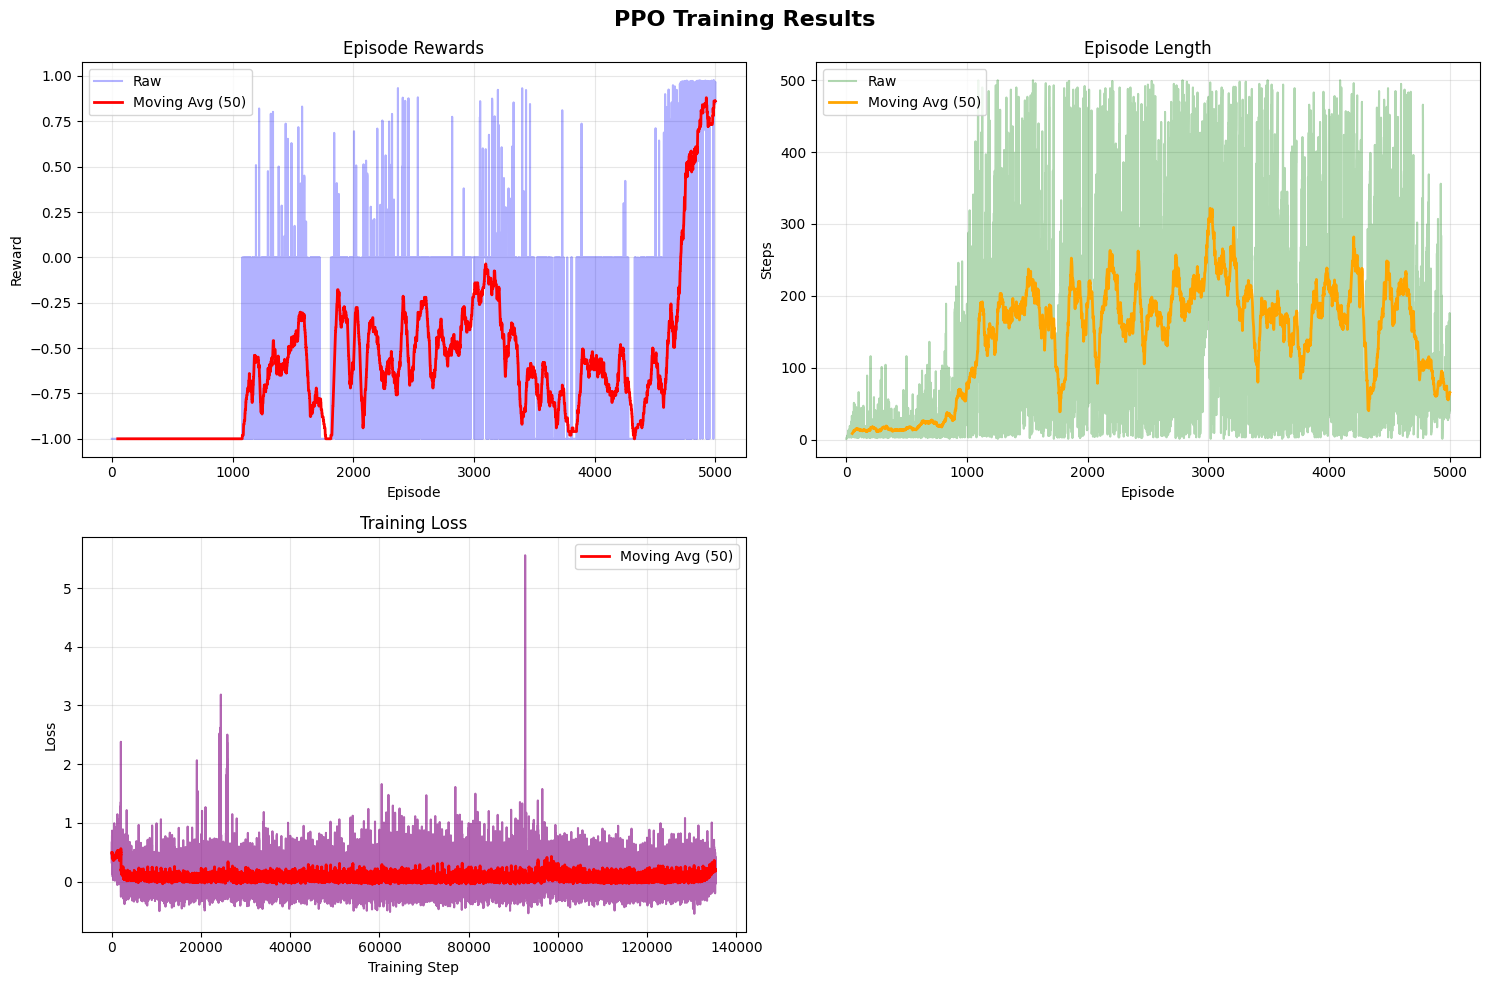

Model exported to: models/16x16/ppo_model.pth


In [ ]:
ppo_logs = run_experiment('PPO',
                          env_name="MiniGrid-Dynamic-Obstacles-16x16-v0",
    num_episodes=5000,
    max_steps=500,      
    num_envs=16,        
    lr=3e-4,            
    update_epochs=4,    
    minibatch_size=64,  
    entropy_coef=0.0, 
)

hyperparameter tuning for dqn on 8x8, 2000 episodes

In [ ]:
hyperparameters_tuning("Double DQN")


HYPERPARAMETERS TUNING FOR DOUBLE DQN ON MINIGRID-DYNAMIC-OBSTACLES-8X8-V0
Total combinations: 8

[1/8] Double DQN with lr=0.001, target_update_freq=1000, batch_size=32

TRAINING DOUBLE DQN ON MINIGRID-DYNAMIC-OBSTACLES-8X8-V0
Episodes: 1500 | Batch Size: 32 | Learning Rate: 0.001
Gamma: 0.99 | Target Update: 1000 | Replay Capacity: 100,000
Epsilon: 1.0 -> 0.05 (decay: 0.995)
[Double DQN] Ep    0 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:   3 | Avg Steps:   3.0 | Epsilon: 0.995 | Loss: 0.0000
[Double DQN] Ep  100 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  14 | Avg Steps:  14.9 | Epsilon: 0.603 | Loss: 0.0003
[Double DQN] Ep  200 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  32 | Avg Steps:  13.0 | Epsilon: 0.365 | Loss: 0.0001
[Double DQN] Ep  300 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  51 | Avg Steps:  26.4 | Epsilon: 0.221 | Loss: 0.0001
[Double DQN] Ep  400 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  57 | Avg Steps:  48.5 | Epsilon: 0.134 | Loss: 0.0001
[Doub

hyperparameter tuning for ppo on 8x8, 5000 episodes

In [ ]:
hyperparameters_tuning("PPO", num_episodes=5000)


HYPERPARAMETERS TUNING FOR PPO ON MINIGRID-DYNAMIC-OBSTACLES-8X8-V0
Total combinations: 8

[1/8] PPO with lr=0.001, entropy_coef=0.01, minibatch_size=32

TRAINING PPO ON MINIGRID-DYNAMIC-OBSTACLES-8X8-V0 WITH 16 ACTORS
[PPO] Ep  864 | Avg Reward:  -1.00 | Avg Steps:   8.6 | Loss: 0.4430
[PPO] Ep 1450 | Avg Reward:  -0.97 | Avg Steps:  15.8 | Loss: 0.4303
[PPO] Ep 1754 | Avg Reward:  -1.00 | Avg Steps:  28.9 | Loss: 0.4237
[PPO] Ep 1882 | Avg Reward:  -0.86 | Avg Steps:  65.6 | Loss: 0.3530
[PPO] Ep 1958 | Avg Reward:  -0.77 | Avg Steps:  97.3 | Loss: 0.2441
[PPO] Ep 2098 | Avg Reward:  -0.90 | Avg Steps:  69.8 | Loss: 0.1877
[PPO] Ep 2152 | Avg Reward:  -0.61 | Avg Steps: 121.5 | Loss: 0.0977
[PPO] Ep 2408 | Avg Reward:  -0.93 | Avg Steps:  28.7 | Loss: 0.2079
[PPO] Ep 2512 | Avg Reward:  -0.84 | Avg Steps:  69.5 | Loss: 0.2451
[PPO] Ep 2621 | Avg Reward:  -0.83 | Avg Steps:  70.5 | Loss: 0.2004
[PPO] Ep 2659 | Avg Reward:  -0.20 | Avg Steps: 138.8 | Loss: 0.1015
[PPO] Ep 3001 | Avg R

DQN run 16x16, 3000 episodes


TRAINING DOUBLE DQN ON MINIGRID-DYNAMIC-OBSTACLES-16X16-V0
Episodes: 3000 | Batch Size: 32 | Learning Rate: 0.0001
Gamma: 0.99 | Target Update: 2000 | Replay Capacity: 100,000
Epsilon: 1.0 -> 0.05 (decay: 0.995)
[Double DQN] Ep    0 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  14 | Avg Steps:  14.0 | Epsilon: 0.995 | Loss: 0.0000
[Double DQN] Ep  100 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps:  18 | Avg Steps:  22.0 | Epsilon: 0.603 | Loss: 0.0029
[Double DQN] Ep  200 | Reward:  -1.00 | Avg Reward:  -1.00 | Steps: 155 | Avg Steps:  40.7 | Epsilon: 0.365 | Loss: 0.0002
[Double DQN] Ep  300 | Reward:  -1.00 | Avg Reward:  -0.92 | Steps:  34 | Avg Steps:  82.4 | Epsilon: 0.221 | Loss: 0.0002
[Double DQN] Ep  400 | Reward:  -1.00 | Avg Reward:  -0.85 | Steps:  43 | Avg Steps: 135.2 | Epsilon: 0.134 | Loss: 0.0005
[Double DQN] Ep  500 | Reward:   0.89 | Avg Reward:  -0.55 | Steps: 126 | Avg Steps:  85.0 | Epsilon: 0.081 | Loss: 0.0013
[Double DQN] Ep  600 | Reward:   0.86 | Avg Rewar

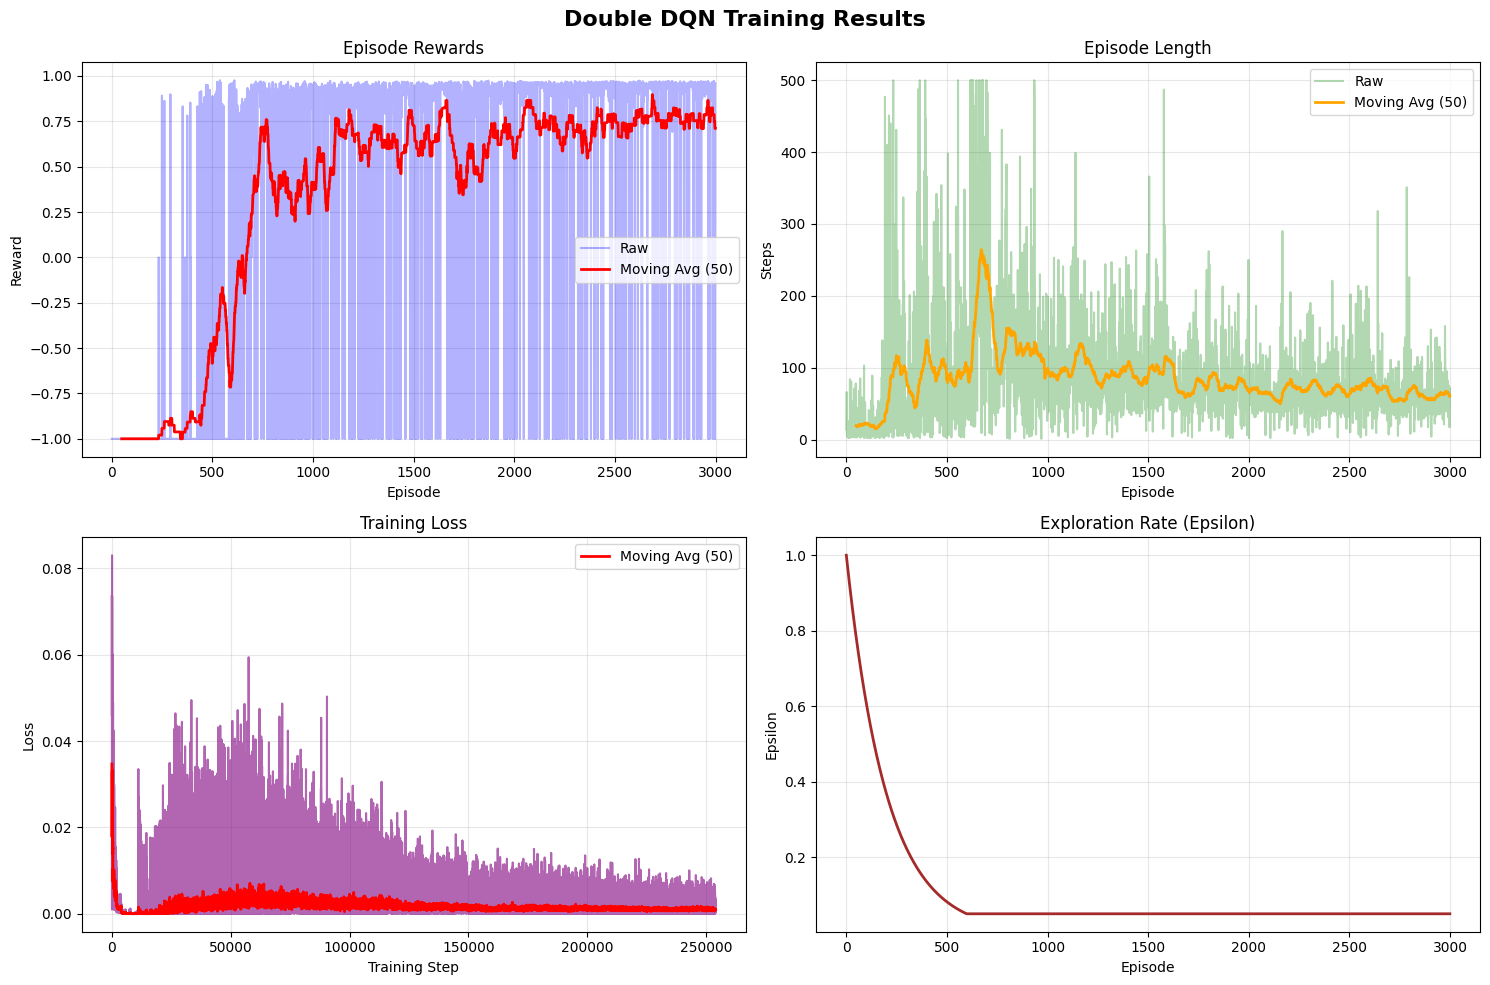

Model exported to: models/16x16/double_dqn_model.pth


{'name': 'Double DQN',
 'rewards': [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,


In [ ]:
run_experiment("Double DQN", lr=1e-4, target_update_freq=2000, batch_size=32)

In [1]:
!nvidia-smi


Sun Jul 27 22:15:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.79                 Driver Version: 566.41         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   66C    P0             33W /   60W |    3926MiB /   4096MiB |     87%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----